In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### 4.26

In [2]:
path = 'E4-26.txt'
data = pd.read_table(path)
n, p = data.shape
data

,x1,x2
0,1,18.95
1,2,19.00
2,3,17.95
3,3,15.54
4,4,14.00
5,5,12.95
6,6,8.94
7,8,7.49
8,9,6.00
9,11,3.99


**(a) Tính $(\textbf{x}_j-\overline{\textbf{x}})^T\textbf{S}^{-1}(\textbf{x}_j-\overline{\textbf{x}}), j = 1, 2,..., 10$ trong đó $\textbf{x}_j=[x_{j1}, x_{j2}]^T$.**

In [3]:
# Tính mean và covariance từ dữ liệu
x_mean = data.mean()
S = np.cov(data.T)

# Tính squared statistical distances
sq_stat_dists = np.array([np.dot(np.dot(np.transpose(data.iloc[i]-x_mean),np.linalg.inv(S)),data.iloc[i]-x_mean) for i in range(n)])
sq_stat_dists_df = pd.DataFrame(sq_stat_dists, columns=['sq_stat_dist'])
sq_stat_dists_df

,sq_stat_dist
0,1.875304
1,2.020326
2,2.900909
3,0.735266
4,0.310519
5,0.017616
6,3.732901
7,0.816540
8,1.375338
9,4.215280


**(b) Sử dụng dữ liệu đã tính ở câu (a), xác định tỷ lệ của các quan sát rơi vào trong miền bao xác suất 50% của phân phối chuẩn 2 chiều.**

In [4]:
chisq = stats.chi2.ppf(0.5, 2)
chisq

1.386294361119891

In [5]:
no_obs = 0
for i in range(len(sq_stat_dists)):
    if sq_stat_dists[i] <= chisq:
        print("Quan trắc thứ {} có tỷ lệ là {}".format(i+1, sq_stat_dists[i]))
        no_obs += 1
print(">> Có {} quan trắc thoả yêu cầu.".format(no_obs))

Quan trắc thứ 4 có tỷ lệ là 0.7352659348994637
Quan trắc thứ 5 có tỷ lệ là 0.3105191714970479
Quan trắc thứ 6 có tỷ lệ là 0.017616204787008708
Quan trắc thứ 8 có tỷ lệ là 0.8165401401502639
Quan trắc thứ 9 có tỷ lệ là 1.3753379462681126
>> Có 5 quan trắc thoả yêu cầu.


**(c) Sắp xếp các khoảng cách ở câu (a) và vẽ đồ thị chi-square.**

In [6]:
sq_stat_dists_sorted = np.sort(sq_stat_dists)
sq_stat_dists_sorted

array([0.0176162 , 0.31051917, 0.73526593, 0.81654014, 1.37533795,
       1.87530448, 2.02032623, 2.9009088 , 3.73290121, 4.21527988])

In [7]:
chisqs = np.array([stats.chi2.ppf(((i+1)-1/2)/n, 2) for i in range(n)])
chisqs

array([0.10258659, 0.32503786, 0.57536414, 0.86156583, 1.195674  ,
       1.59701539, 2.09964425, 2.77258872, 3.79423997, 5.99146455])

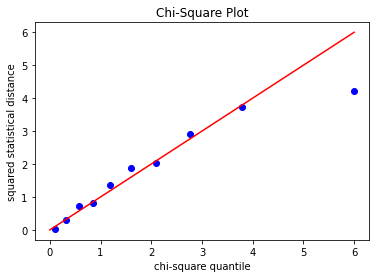

In [8]:
plt.scatter(x=chisqs, y=sq_stat_dists_sorted, color='blue')
plt.title('Chi-Square Plot')
plt.xlabel('chi-square quantile')
plt.ylabel("squared statistical distance")
x = np.array(range(0,7))
plt.plot(x,x,'red')
plt.show()

**(d) Từ kết quả tính được ở câu (b) và (c), dữ liệu trên có xấp xỉ phân phối chuẩn hai chiều không?**

* Từ kết quả câu (b), có đúng 50% quan trắc rời vào miền bao xác suất 50% của phân phối chuẩn 2 chiều.
* Từ kết quả câu (c), đồ thị chi-square có dạng gần tuyến tính, ngoại trừ một điểm ngoại lai.
* Với cỡ mẫu $n=10$ khá nhỏ nên rất khó để bác bỏ giả thuyết dữ liệu trên xấp xỉ phân phối chuẩn 2 chiều.

Từ những điều trên, ta có thể kết luận rằng dữ liệu đề bài có xấp xỉ phân phối chuẩn 2 chiều.

### 4.29.

In [9]:
path = 'E4-29.txt'
data = pd.read_table(path, delim_whitespace=True, usecols=['x5','x6'])
n, p = data.shape
data.head(10)

,x5,x6
0,12,8
1,9,5
2,5,6
3,8,15
4,8,10
5,12,12
6,12,15
7,21,14
8,11,11
9,13,9


**(a) Tính khoảng cách thống kê $(\textbf{x}_j-\overline{\textbf{x}})^T\textbf{S}^{-1}(\textbf{x}_j-\overline{\textbf{x}}),j=1,2,...,42$ trong đó $\textbf{x}_j=[x_{j5},x_{j6}]^T$.**

In [10]:
# Tính mean và covariance từ dữ liệu
x_mean = data.mean()
S = np.cov(data.T)

# Tính squared statistical distances
sq_stat_dists = np.array([np.dot(np.dot(np.transpose(data.iloc[i]-x_mean),np.linalg.inv(S)),data.iloc[i]-x_mean) for i in range(n)])
sq_stat_dists_df = pd.DataFrame(sq_stat_dists, columns=['sq_stat_dist'])
sq_stat_dists_df

,sq_stat_dist
0,0.460652
1,0.659221
2,2.377061
3,1.628290
4,0.413536
5,0.476073
6,1.184889
7,10.639179
8,0.138834
9,0.816247


**(b) Xác định tỷ lệ của các quan trắc $\textbf{x}_j=[x_{j5},x_{j6}]^T,j=1,2,...,42$ rơi vào miền bao xác suất 50% của phân phối chuẩn 2 chiều**

In [11]:
chisq = stats.chi2.ppf(0.5, 2)
chisq

1.386294361119891

In [12]:
no_obs = 0
for i in range(len(sq_stat_dists)):
    if sq_stat_dists[i] <= chisq:
        print("Quan trắc thứ {} có tỷ lệ là {}".format(i+1, sq_stat_dists[i]))
        no_obs += 1
print(">> Có {} quan trắc thoả yêu cầu.".format(no_obs))

Quan trắc thứ 1 có tỷ lệ là 0.4606523552654811
Quan trắc thứ 2 có tỷ lệ là 0.6592206345785215
Quan trắc thứ 5 có tỷ lệ là 0.4135363565646298
Quan trắc thứ 6 có tỷ lệ là 0.47607263026524094
Quan trắc thứ 7 có tỷ lệ là 1.1848894611961092
Quan trắc thứ 9 có tỷ lệ là 0.13883386298670963
Quan trắc thứ 10 có tỷ lệ là 0.81624681520988
Quan trắc thứ 11 có tỷ lệ là 1.3566300591687883
Quan trắc thứ 12 có tỷ lệ là 0.6228095781062669
Quan trắc thứ 14 có tỷ lệ là 0.31594983851212183
Quan trắc thứ 15 có tỷ lệ là 0.4135363565646298
Quan trắc thứ 16 có tỷ lệ là 0.12249733044955191
Quan trắc thứ 17 có tỷ lệ là 0.8987982257829785
Quan trắc thứ 20 có tỷ lệ là 0.6592206345785215
Quan trắc thứ 22 có tỷ lệ là 1.0360060952350683
Quan trắc thứ 23 có tỷ lệ là 0.7874152446997652
Quan trắc thứ 26 có tỷ lệ là 1.0360060952350683
Quan trắc thứ 27 có tỷ lệ là 0.13883386298670963
Quan trắc thứ 28 có tỷ lệ là 0.8856041172444513
Quan trắc thứ 29 có tỷ lệ là 0.13797190219226885
Quan trắc thứ 31 có tỷ lệ là 0.19011883348

**(c) Vẽ đồ thị chi-square cho các khoảng cách đã được sắp xếp ở câu (a)**

In [13]:
sq_stat_dists_sorted = np.sort(sq_stat_dists)
sq_stat_dists_sorted

array([ 0.12249733,  0.12249733,  0.1379719 ,  0.13883386,  0.13883386,
        0.19011883,  0.31594984,  0.41353636,  0.41353636,  0.46065236,
        0.46065236,  0.47607263,  0.62280958,  0.63702175,  0.65922063,
        0.65922063,  0.70324851,  0.78741524,  0.81624682,  0.88560412,
        0.89879823,  1.0360061 ,  1.0360061 ,  1.14719395,  1.18488946,
        1.35663006,  1.45842288,  1.62829024,  1.80136111,  1.89847083,
        2.24888674,  2.37706099,  2.77414155,  2.77825962,  3.00891219,
        3.4437748 ,  4.7646873 ,  5.64943915,  6.14886059,  7.08572374,
        8.47306491, 10.63917918])

In [14]:
chisqs = np.array([stats.chi2.ppf(((i+1)-1/2)/n, 2) for i in range(n)])
chisqs

array([0.02395238, 0.07273529, 0.12273789, 0.17402275, 0.22665737,
       0.28071472, 0.33627384, 0.39342059, 0.45224836, 0.51285906,
       0.57536414, 0.63988587, 0.70655871, 0.77553106, 0.84696723,
       0.92104977, 0.99798233, 1.077993  , 1.16133839, 1.24830862,
       1.33923337, 1.43448946, 1.53451031, 1.63979777, 1.75093747,
       1.86861847, 1.99365919, 2.12704194, 2.26995987, 2.42388195,
       2.59064517, 2.77258872, 2.97275564, 3.19520691, 3.4455332 ,
       3.73173488, 4.06584305, 4.46718444, 4.9698133 , 5.64275777,
       6.66440902, 8.8616336 ])

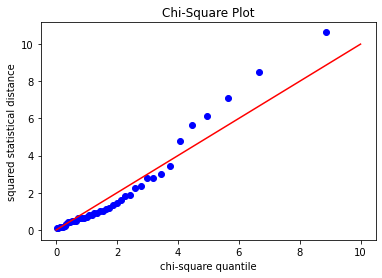

In [15]:
plt.scatter(x=chisqs, y=sq_stat_dists_sorted, color='blue')
plt.title('Chi-Square Plot')
plt.xlabel('chi-square quantile')
plt.ylabel("squared statistical distance")
x = np.array(range(0,11))
plt.plot(x,x,'red')
plt.show()

### 4.30

In [16]:
path = 'E4-26.txt'
data = pd.read_table(path)
n, p = data.shape
data

,x1,x2
0,1,18.95
1,2,19.00
2,3,17.95
3,3,15.54
4,4,14.00
5,5,12.95
6,6,8.94
7,8,7.49
8,9,6.00
9,11,3.99


**(a) Xác định power transformation $\hat{\lambda}_1$ làm cho $x_1$ xấp xỉ phân phối chuẩn. Xây dựng đồ thị *Q-Q* cho dữ liệu transformed.**

Giá trị lambda1 là 0.3708905495015787


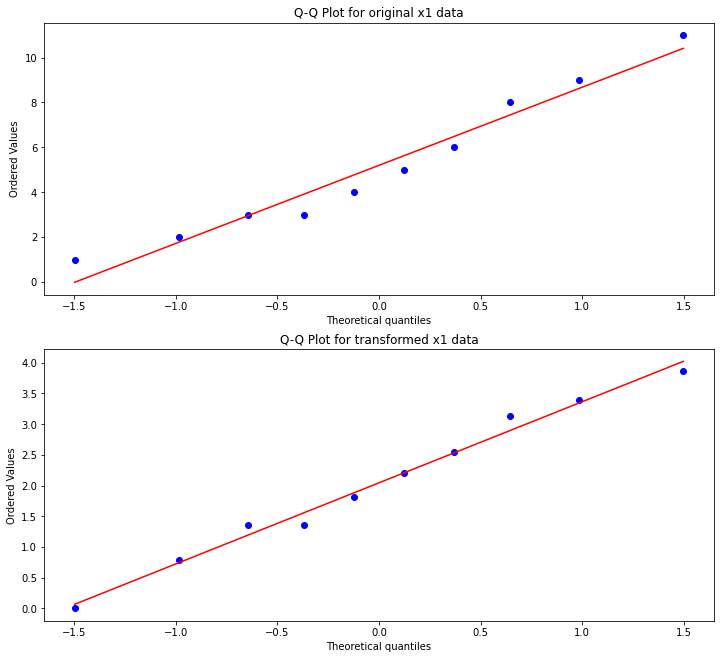

In [17]:
fig, axs = plt.subplots(2,1, figsize=(12,11))
prob = stats.probplot(data['x1'], dist=stats.norm, plot=axs[0])
axs[0].set_title('Q-Q Plot for original x1 data')

x1_trans, lambda1 = stats.boxcox(data['x1'])
prob = stats.probplot(x1_trans, dist=stats.norm, plot=axs[1])
axs[1].set_title('Q-Q Plot for transformed x1 data')

print("Giá trị lambda1 là {}".format(lambda1))
plt.show()

**(b) Xác định power transformation $\hat{\lambda}_2$ làm cho $x_2$ xấp xỉ phân phối chuẩn. Xây dựng đồ thị *Q-Q* cho dữ liệu transformed.**

Giá trị lambda2 là 0.936196560184179


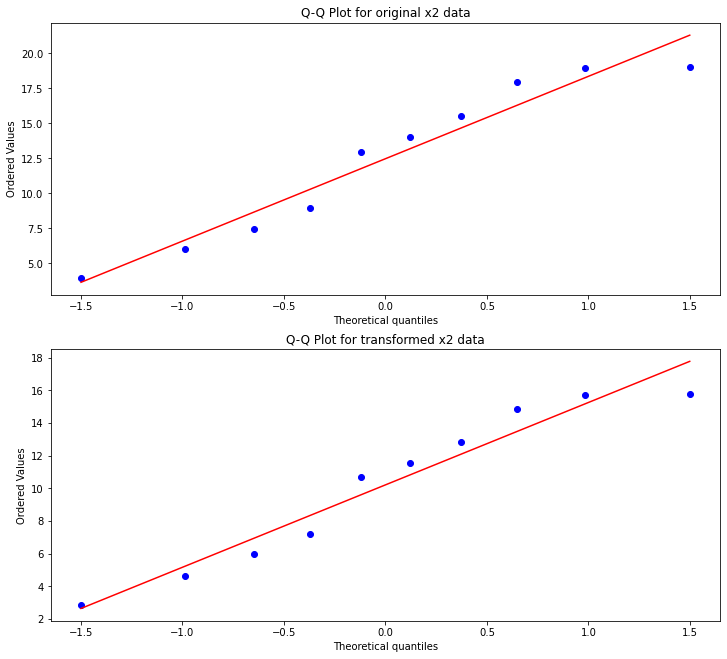

In [18]:
fig, axs = plt.subplots(2,1, figsize=(12,11))
prob = stats.probplot(data['x2'], dist=stats.norm, plot=axs[0])
axs[0].set_title('Q-Q Plot for original x2 data')

x2_trans, lambda2 = stats.boxcox(data['x2'])
prob = stats.probplot(x2_trans, dist=stats.norm, plot=axs[1])
axs[1].set_title('Q-Q Plot for transformed x2 data')

print("Giá trị lambda2 là {}".format(lambda2))
plt.show()

**(c) Xác định power transformation $\widehat{\boldsymbol{\lambda}}=[\hat{\lambda}_1, \hat{\lambda}_2]^T$ làm cho $[x_1, x_2]$ xấp xỉ phân phối chuẩn. So sánh với các kết quả thu được từ câu (a) và (b).**

In [19]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
pt.fit(data)

print("Power transformations lambda = [lambda1, lambda2]^T là :\n [{}, {}]".format(pt.lambdas_[0],pt.lambdas_[1]))

Power transformations lambda = [lambda1, lambda2]^T là :
 [0.3708905495015787, 0.936196560184179]


Từ kết quả trên cho thấy vectơ $\hat{\boldsymbol\lambda}$ có các giá trị thành phần $\hat{\lambda}_1, \hat{\lambda}_2$ giống với kết quả tìm được ở câu (a) và (b).

### 4.39

In [20]:
path = 'E4-39.txt'
data = pd.read_table(path)
data = data[['Indep', 'Supp','Benev','Conform','Leader']]
n, p = data.shape
data

,Indep,Supp,Benev,Conform,Leader
0,27,13,14,20,11
1,12,13,24,25,6
2,14,20,15,16,7
3,18,20,17,12,6
4,9,22,22,21,6
...,...,...,...,...,...
125,10,11,26,17,10
126,14,12,14,11,29
127,19,11,23,18,13
128,27,19,22,7,9


**(a) Kiểm tra mỗi biến *independence* (Indep), *support* (Supp), *benevolence* (Benev), *conformity* (Conform) và *leadership* (Leader) có tuân theo phân phối chuẩn không?**

Ta xét kiểm định $H_0$: biến thứ $i$ có phân phối chuẩn nhiều chiều. 

Với mức ý nghĩa $\alpha = 0.05$ ta sẽ bác bỏ giả thuyết $H_0$ nếu *p-value < 0*.

In [21]:
from scipy.stats import shapiro

alpha = 0.05
for col in data.columns:
    stat, pvalue = shapiro(data[col])
    if pvalue < alpha:
        # Bác bỏ giả thuyết H0
        print("{}\t không tuân theo phân phối chuẩn.".format(col))
    else:
        # Không bác bỏ giả thuyết H0
        print("{}\t tuân theo phân phối chuẩn.".format(col))      

Indep	 không tuân theo phân phối chuẩn.
Supp	 không tuân theo phân phối chuẩn.
Benev	 tuân theo phân phối chuẩn.
Conform	 tuân theo phân phối chuẩn.
Leader	 không tuân theo phân phối chuẩn.


Như vậy, từ kiểm định trên, ta thấy rằng chỉ có các biến **Benev** và **Conform** là có phân phối chuẩn.

**(b) Từ 5 cột đã được chọn ở trên thì dữ liệu có tuân theo phân phối chuẩn nhiều chiều không?**

In [22]:
import pingouin as pg

pg.multivariate_normality(data, alpha=.05)

HZResults(hz=113.70625383991228, pval=0.0, normal=False)

Từ kết quả chạy hàm **multivariate_normality** của thư viện **pingouin**, ta kết luận rằng dữ liệu không tuân theo phân phối chuẩn nhiều chiều.

**(c) Đối với các biến không tuân theo phân phối chuẩn, xác định chỉ số transformation để làm chúng xấp xỉ về phân phối chuẩn.**

In [23]:
pt = PowerTransformer(method = 'box-cox')

# Indep collumn
pt.fit(data['Indep'].values.reshape(-1,1))
print('Chỉ số transformation lambda ở cột Indep là: \nlambda = {}\n'.format(pt.lambdas_[0]))

# Supp collumn
pt.fit(data['Supp'].values.reshape(-1,1))
print('Chỉ số transformation lambda ở cột Supp là: \nlambda = {}\n'.format(pt.lambdas_[0]))

# Leader collumn
pt.fit(data['Leader'].values.reshape(-1,1))
print('Chỉ số transformation lambda ở cột Leader là: \nlambda = {}'.format(pt.lambdas_[0]))

Chỉ số transformation lambda ở cột Indep là: 
lambda = 0.5237724084489533

Chỉ số transformation lambda ở cột Supp là: 
lambda = 1.3962614531817246

Chỉ số transformation lambda ở cột Leader là: 
lambda = 0.38154698798959247
